In [ ]:
import sys
assert sys.version_info >= (3, 5)

In [6]:
!pip3 install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 39.4 MB/s eta 0:00:0031m41.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 50.2 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 31.1 MB/s eta 0:00:00


In [7]:
import sklearn

$ax + by + cz = 10$

$dx + ey + fz = 50$

$gx + hy + jz = 70$

---

$3x + 2y + 5z = 10$

$2x + 6y + 4z = 20$

$6x + 7y + 9z = 30$

$A\textbf{x} = b$

A = $
\begin{pmatrix} 3 & 2 & 5 \\
2 & 6 & 4 \\
6 & 7 & 9 \end{pmatrix}
$

행렬은 대개 대문자를 이용하여 표시한다.

$3 \times 3$ Matrix

**x** = $\begin{pmatrix} x \\ y \\ z\end{pmatrix}$

벡터는 굵은 글씨(Bold체)로 표시한다.

$3 \times 1$ Matrix

Column Vector: 열 벡터 (열이 1인 벡터)

b = $\begin{pmatrix} 10 \\ 20 \\ 30\end{pmatrix}$

$\begin{pmatrix} x & y & z\end{pmatrix}$

$1 \times 3$ Matrix

Row Vector: 행 벡터 (행이 1인 벡터)

In [ ]:
import pandas as pd

In [16]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))

    return full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]

In [8]:
import os

In [9]:
datapath = os.path.join("datasets", "lifesat", "")

In [10]:
import matplotlib as mpl

In [11]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [12]:
import urllib.request

In [13]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

os.makedirs(datapath, exist_ok=True)

for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

     LOCATION         Country INDICATOR   
0         AUS       Australia   HO_BASE  \
1         AUT         Austria   HO_BASE   
2         BEL         Belgium   HO_BASE   
3         CAN          Canada   HO_BASE   
4         CZE  Czech Republic   HO_BASE   
...       ...             ...       ...   
3287      EST         Estonia   WL_TNOW   
3288      ISR          Israel   WL_TNOW   
3289      RUS          Russia   WL_TNOW   
3290      SVN        Slovenia   WL_TNOW   
3291     OECD    OECD - Total   WL_TNOW   

                                      Indicator MEASURE Measure INEQUALITY   
0            Dwellings without basic facilities       L   Value        TOT  \
1            Dwellings without basic facilities       L   Value        TOT   
2            Dwellings without basic facilities       L   Value        TOT   
3            Dwellings without basic facilities       L   Value        TOT   
4            Dwellings without basic facilities       L   Value        TOT   
...            

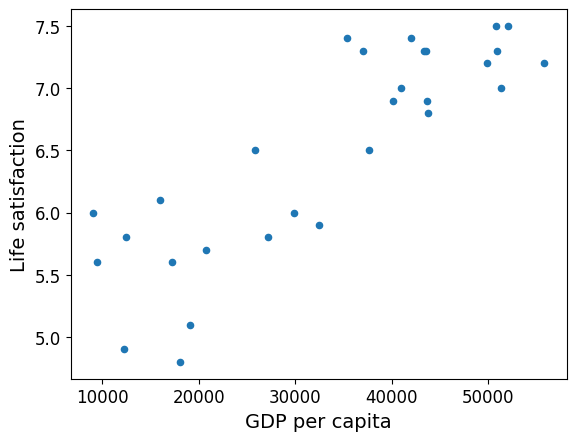

In [18]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=",")

gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=",", delimiter="\t",
                             encoding="latin1", na_values="n/a")

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")

plt.show()

In [19]:
model = sklearn.linear_model.LinearRegression()

In [20]:
model.fit(X, y)

LinearRegression()

In [21]:
X_new = [[80000]]

print(model.predict(X_new))

[[8.78228847]]


In [22]:
X_new = [[35000]]

print(model.predict(X_new))

[[6.57209341]]


In [23]:
model.coef_[0][0]

4.911544589158486e-05

In [24]:
model.intercept_[0]

4.853052800266435

In [ ]:
X = np.linspace(0, 60000, 1000)

In [25]:
y = model.coef_[0][0] * X + model.intercept_[0]

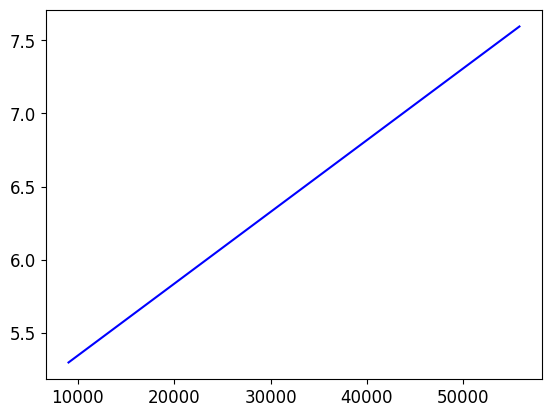

In [26]:
plt.plot(X, y, "b")
plt.show()

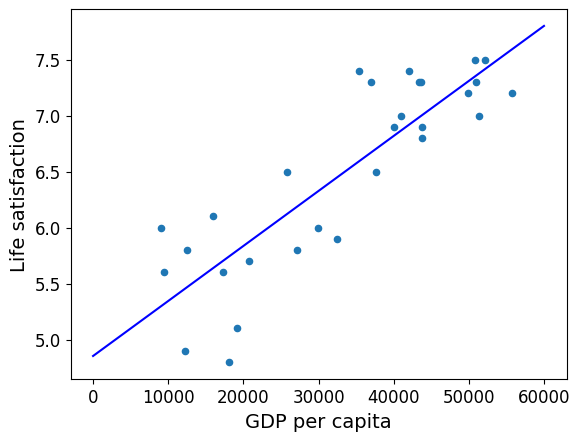

In [28]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=",")

gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=",", delimiter="\t",
                             encoding="latin1", na_values="n/a")

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")

X_sub = np.linspace(0, 60000, 1000)
y = model.coef_[0][0] * X_sub + model.intercept_[0]

plt.plot(X_sub, y, "b")

plt.show()